                                                
# ANNEX:B
# US COVID 19 CASES PREDICTION
## SUBMITTED BY: FAISAL JAVED
### MACHINE LEARNING PROJECT (MS RIME 2020)

In [1]:
import pandas as pd
import numpy as np

## DATA SET DETAILS 
### GATHERING & CLEANING

In [2]:
Data = pd.read_excel("USA Statewise Covid Data.xlsx")
Data.head()

,Date,Xo,Date_Code,States_Code,Temperatures,Humidity,LandArea,Population_Density,Cases_per_day
0,2020-12-06,1,0,1,11.6,77.1,570641,1.2863,757
1,2020-12-06,1,0,2,46.6,71.6,50645,96.9221,2288
2,2020-12-06,1,0,3,41.3,70.9,52035,58.403,1542
3,2020-12-06,1,0,4,38.0,80.0,77,716,0
4,2020-12-06,1,0,5,43.6,38.5,113594,64.9549,5376


In [3]:
Data = Data.sample(frac=1)
Data

,Date,Xo,Date_Code,States_Code,Temperatures,Humidity,LandArea,Population_Density,Cases_per_day
8985,2020-06-29,1,160,26,64.6,70.4,79627,71.5922,312
5351,2020-09-02,1,95,32,57.1,70.9,69001,11.0393,266
13244,2020-04-14,1,236,29,63.6,73.6,46923,63.7056,145
9412,2020-06-21,1,168,5,76.0,38.5,113594,64.9549,2592
9036,2020-06-28,1,161,21,79.8,74.0,43204,107.517,1467
...,...,...,...,...,...,...,...,...,...
14643,2020-03-20,1,261,28,0.0,70.0,178,324,0
2,2020-12-06,1,0,3,41.3,70.9,52035,58.403,1542
3045,2020-10-13,1,54,22,50.5,71.1,7800,894.436,749
4763,2020-09-12,1,85,4,0.0,80.0,77,716,0


In [4]:
X = Data.drop(['Date','Cases_per_day','LandArea'],1)

In [5]:
X.dtypes

Xo                      int64
Date_Code               int64
States_Code             int64
Temperatures          float64
Humidity              float64
Population_Density     object
dtype: object

In [6]:
Y = Data['Cases_per_day']
Y.head()

8985      312
5351      266
13244     145
9412     2592
9036     1467
Name: Cases_per_day, dtype: int64

In [7]:
X['Population_Density']= X['Population_Density'].astype(float)

In [8]:
X.dtypes

Xo                      int64
Date_Code               int64
States_Code             int64
Temperatures          float64
Humidity              float64
Population_Density    float64
dtype: object

### Defining New Features

In [9]:
X['Weather']=X['Temperatures']*X['Humidity']
X['Temperature_sq'] = X['Temperatures']**2
X['Humidity_sq'] = X['Humidity']**2
X['Population_Density_sq'] = X['Population_Density']**2

In [10]:
X

,Xo,Date_Code,States_Code,Temperatures,Humidity,Population_Density,Weather,Temperature_sq,Humidity_sq,Population_Density_sq
8985,1,160,26,64.6,70.4,71.5922,4547.84,4173.16,4956.16,5125.443101
5351,1,95,32,57.1,70.9,11.0393,4048.39,3260.41,5026.81,121.866144
13244,1,236,29,63.6,73.6,63.7056,4680.96,4044.96,5416.96,4058.403471
9412,1,168,5,76.0,38.5,64.9549,2926.00,5776.00,1482.25,4219.139034
9036,1,161,21,79.8,74.0,107.5174,5905.20,6368.04,5476.00,11559.991303
...,...,...,...,...,...,...,...,...,...,...
14643,1,261,28,0.0,70.0,324.0000,0.00,0.00,4900.00,104976.000000
2,1,0,3,41.3,70.9,58.4030,2928.17,1705.69,5026.81,3410.910409
3045,1,54,22,50.5,71.1,894.4359,3590.55,2550.25,5055.21,800015.579209
4763,1,85,4,0.0,80.0,716.0000,0.00,0.00,6400.00,512656.000000


### SCALING OF DATA

In [11]:
x = X/(X.max(axis=0) + np.spacing(0))

In [12]:
x.head()

,Xo,Date_Code,States_Code,Temperatures,Humidity,Population_Density,Weather,Temperature_sq,Humidity_sq,Population_Density_sq
8985,1.0,0.606061,0.464286,0.780193,0.88000,0.006207,0.745358,0.608701,0.774400,3.852088e-05
5351,1.0,0.359848,0.571429,0.689614,0.88625,0.000957,0.663502,0.475567,0.785439,9.158996e-07
13244,1.0,0.893939,0.517857,0.768116,0.92000,0.005523,0.767176,0.590002,0.846400,3.050142e-05
9412,1.0,0.636364,0.089286,0.917874,0.48125,0.005631,0.479550,0.842493,0.231602,3.170944e-05
9036,1.0,0.609848,0.375000,0.963768,0.92500,0.009321,0.967820,0.928849,0.855625,8.688050e-05


### SPLITTING OF DATA SET INTO TRAIN,TEST & VALID DATA

In [13]:
data_train = round(0.6*len(Data))
data_valid = round(data_train+0.2*len(Data))

In [14]:
train_x = x[:data_train]
valid_x = x[data_train:data_valid]
test_x = x[data_valid:]

In [15]:
train_y = Y[:data_train]
valid_y = Y[data_train:data_valid]
test_y = Y[data_valid:]

In [16]:
train_x

,Xo,Date_Code,States_Code,Temperatures,Humidity,Population_Density,Weather,Temperature_sq,Humidity_sq,Population_Density_sq
8985,1.0,0.606061,0.464286,0.780193,0.88000,0.006207,0.745358,0.608701,0.774400,3.852088e-05
5351,1.0,0.359848,0.571429,0.689614,0.88625,0.000957,0.663502,0.475567,0.785439,9.158996e-07
13244,1.0,0.893939,0.517857,0.768116,0.92000,0.005523,0.767176,0.590002,0.846400,3.050142e-05
9412,1.0,0.636364,0.089286,0.917874,0.48125,0.005631,0.479550,0.842493,0.231602,3.170944e-05
9036,1.0,0.609848,0.375000,0.963768,0.92500,0.009321,0.967820,0.928849,0.855625,8.688050e-05
...,...,...,...,...,...,...,...,...,...,...
4683,1.0,0.314394,0.642857,0.783816,0.57375,0.001498,0.488222,0.614368,0.329189,2.245451e-06
11573,1.0,0.780303,0.678571,0.678744,0.88375,0.035763,0.651202,0.460693,0.781014,1.278965e-03
5176,1.0,0.348485,0.446429,0.723430,0.90125,0.015402,0.707819,0.523351,0.812252,2.372294e-04
11448,1.0,0.772727,0.446429,0.661836,0.90125,0.015402,0.647553,0.438027,0.812252,2.372294e-04


In [17]:
valid_x

,Xo,Date_Code,States_Code,Temperatures,Humidity,Population_Density,Weather,Temperature_sq,Humidity_sq,Population_Density_sq
5646,1.0,0.378788,0.839286,0.919082,0.86750,0.014502,0.865574,0.844712,0.752556,0.000210
14208,1.0,0.958333,0.732143,0.506039,0.85750,0.003885,0.471084,0.256075,0.735306,0.000015
1234,1.0,0.083333,0.053571,0.612319,0.88625,0.005063,0.589134,0.374934,0.785439,0.000026
6946,1.0,0.469697,0.053571,0.962560,0.88625,0.005063,0.926114,0.926522,0.785439,0.000026
8632,1.0,0.583333,0.160714,0.944444,0.77500,1.000000,0.794618,0.891975,0.600625,1.000000
...,...,...,...,...,...,...,...,...,...,...
4042,1.0,0.272727,0.196429,0.967391,0.93125,0.035555,0.978022,0.935846,0.867227,0.001264
1836,1.0,0.121212,0.803571,0.650966,0.86375,0.015025,0.610417,0.423757,0.746064,0.000226
11613,1.0,0.784091,0.392857,0.678744,0.88875,0.077541,0.654886,0.460693,0.789877,0.006013
12583,1.0,0.848485,0.714286,0.725845,0.80000,0.004998,0.630397,0.526852,0.640000,0.000025


In [18]:
test_x

,Xo,Date_Code,States_Code,Temperatures,Humidity,Population_Density,Weather,Temperature_sq,Humidity_sq,Population_Density_sq
418,1.0,0.026515,0.482143,0.539855,0.86500,0.007780,0.506960,0.291443,0.748225,0.000061
824,1.0,0.053030,0.732143,0.491546,0.85750,0.003885,0.457592,0.241617,0.735306,0.000015
11394,1.0,0.768939,0.482143,0.777778,0.86500,0.007780,0.730385,0.604938,0.748225,0.000061
3131,1.0,0.208333,0.928571,0.554348,0.89625,0.005907,0.539376,0.307302,0.803264,0.000035
9125,1.0,0.613636,0.964286,0.785024,0.89500,0.009367,0.762757,0.616263,0.801025,0.000088
...,...,...,...,...,...,...,...,...,...,...
14643,1.0,0.988636,0.500000,0.000000,0.87500,0.028088,0.000000,0.000000,0.765625,0.000789
2,1.0,0.000000,0.053571,0.498792,0.88625,0.005063,0.479906,0.248794,0.785439,0.000026
3045,1.0,0.204545,0.392857,0.609903,0.88875,0.077541,0.588465,0.371982,0.789877,0.006013
4763,1.0,0.321970,0.071429,0.000000,1.00000,0.062072,0.000000,0.000000,1.000000,0.003853


In [19]:
train_y

8985      312
5351      266
13244     145
9412     2592
9036     1467
         ... 
4683       81
11573    2390
5176      896
11448     336
4151      155
Name: Cases_per_day, Length: 8904, dtype: int64

In [20]:
valid_y

5646     1636
14208      65
1234        0
6946      784
8632       35
         ... 
4042     2809
1836      918
11613    1165
12583      60
14750      28
Name: Cases_per_day, Length: 2968, dtype: int64

In [21]:
test_y

418      3193
824      1502
11394     114
3131        9
9125      559
         ... 
14643       0
2        1542
3045      749
4763        0
5063       19
Name: Cases_per_day, Length: 2968, dtype: int64

### MATHEMATICAL MODEL:

In [22]:
theeta = np.array([0]*len(train_x.columns))

In [23]:
theeta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
def hypothesis (theeta,train_x):  #Defining Hypothesis function
    h = theeta*train_x
    return h

In [25]:
def Cost_function (train_x,train_y,theeta,lamda):    # Cost function with regularisation.
    y_1 = hypothesis(theeta,train_x)
    y_1 = np.sum(y_1,axis=1)
    var2 = (lamda/(2*len(train_x)))*np.sum((theeta[1:]**2)) # var2 uses new variable lamda to regularise theeta.
    var1 = np.sum((y_1-train_y)**2)/(2*len(train_x))
    cost = var1 + var2
    return cost 
 
# Reference Slide 09, Lecture 05


In [26]:
def Gradient_Descent(train_x, train_y, theeta, alpha, i,lamda):
    J = []  # Initial value of Cost (J) is empty. 
    J_cv = []
    for iterator in range (0,i):        
        y_1 = hypothesis(theeta, train_x)
        y_1 = np.sum(y_1, axis=1)
# Gradient descent algorithm to find values of theeta (theeta(0)...theeta(6)). Regularisation term is added for all value
# of theetas except theeta(0)..... reference Slide 12, lecture 05
        for  c in range(0, len(train_x.columns)):
            if c == 0:
                theeta[c] = theeta[c] - alpha*(sum((y_1-train_y)*train_x.iloc[:,c])/len(train_x))
            else:
                theeta[c] = (theeta[c]*(1-(alpha*(lamda/len(train_x))))) - alpha*(sum((y_1-train_y)*train_x.iloc[:,c])/len(train_x))
        
        j = Cost_function(train_x, train_y, theeta,lamda)
        J.append(j)  #Storing value of J for each theeta
        j_cv = Cost_function(valid_x, valid_y, theeta,lamda)
        J_cv.append(j_cv)
    return J, j, theeta, J_cv,j_cv

### OUTPUT OF THE MODEL

In [27]:
J, j, theeta,J_cv,j_cv= Gradient_Descent(train_x,train_y,theeta,0.01,2000,1000)


In [28]:
theeta

array([ 365, -115,   82,  156,  201,    0,  135,  100,  154,    0])

### PREDICTION OF CASES ON TEST DATA

In [29]:
y_1 = hypothesis(theeta, test_x)
y_1 = np.sum(y_1, axis=1)
y_1

418      872.379424
824      867.149698
11394    885.628456
3131     911.057620
9125     963.818353
            ...    
14643    586.088068
2        835.964990
3045     885.757246
4763     688.830628
5063     910.507069
Length: 2968, dtype: float64

### ERROR ON TEST DATA SET

In [30]:
def RMSE(y_1, test_y):
    return np.sqrt((y_1 - test_y) ** 2).mean()
rmse_val = RMSE(np.array(y_1), np.array(test_y))
print(f" Root Mean Square Error is:  {rmse_val}")

 Root Mean Square Error is:  972.2698140864471


In [31]:
def MSE(y_1, test_y):
    return (1/len(test_x))*np.sum((y_1 - test_y) ** 2)
mse_val = MSE(np.array(y_1), np.array(test_y))
print(f" Mean Square Error is:  {mse_val}")

 Mean Square Error is:  3197262.1315421914


### PLOTTING ACTUAL vs PREDICTED CASES

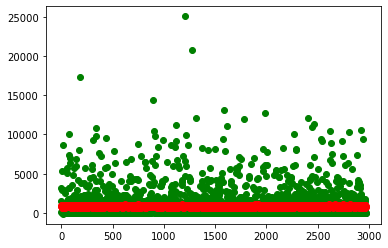

In [32]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, len(test_x))),y= test_y, color='green')         
plt.scatter(x=list(range(0, len(test_x))), y=y_1, color='red')
plt.show()

### TESTING ON VALID DATA SET

In [33]:
###VALID DATA
y_2 = hypothesis(theeta, valid_x)
y_2 = np.sum(y_2, axis=1)
y_2

5646     1025.222415
14208     768.567867
1234      871.451642
6946      982.308612
8632      903.170750
            ...     
4042     1047.008251
1836      931.793799
11613     847.686584
12583     836.376332
14750     743.847008
Length: 2968, dtype: float64

In [34]:
### ERROR ON VALID DATA
def RMSE(y_2, valid_y):
    return np.sqrt((y_2 - valid_y) ** 2).mean()
rmse_val = RMSE(np.array(y_2), np.array(valid_y))
print(f" Rms error is:  {rmse_val}")

 Rms error is:  991.729687236199


In [35]:
def MSE(y_2, valid_y):
    return (1/len(valid_x))*np.sum((y_2 - valid_y) ** 2)
mse_val = MSE(np.array(y_2), np.array(valid_y))
print(f" Mean Square Error is:  {mse_val}")

 Mean Square Error is:  3413077.8409978566


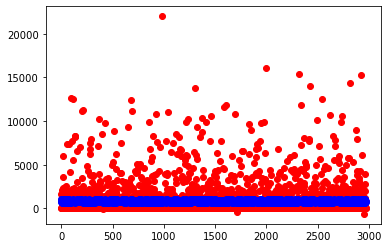

In [36]:
### PLOTTING VALID DATA POINTS 
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, len(valid_x))),y= valid_y, color='red')         
plt.scatter(x=list(range(0, len(valid_x))), y=y_2, color='blue')
plt.show()

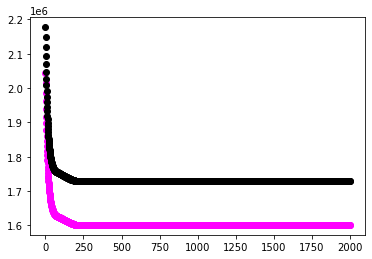

In [37]:
plt.figure()
plt.scatter(x=list(range(0, 2000)), y=J, color ='magenta')
plt.scatter(x=list(range(0, 2000)), y=J_cv, color ='black')
plt.show()